In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT AND PRE-PROCESS DATA #

In [2]:
df_o = pd.read_csv("../Datasets/moocs23-24.csv")
df_o.head()

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32


In [3]:
len(df_o)

416921

In [4]:
df_o.columns

Index(['Id', 'institute', 'course_id', 'year', 'semester', 'userid_DI',
       'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI',
       'gender', 'grade', 'start_time_DI', 'last_event_DI', 'nevents',
       'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'incomplete_flag', 'age'],
      dtype='object')

In [5]:
df = df_o.copy()

## Check columns for n/a values ##

In [6]:
df.isna().sum()

Id                       0
institute                0
course_id                0
year                     0
semester                 0
userid_DI                0
viewed                   0
explored                 0
certified                0
final_cc_cname_DI        0
LoE_DI                   0
gender               23211
grade                    0
start_time_DI            0
last_event_DI            0
nevents                  0
ndays_act                0
nplay_video              0
nchapters                0
nforum_posts             0
incomplete_flag          0
age                      0
dtype: int64

In [7]:
print("Percentage of entries that lack gender information: ",format(23211/len(df_o)*100, ".2f"), "%")

Percentage of entries that lack gender information:  5.57 %


Because gender is one key feature of this dataset and because it is the only aspect of the dataset that appears to be missing, it makes sense to remove the rows with missing values in order to reduce the amount of "noise" in the data itself.

In [8]:
# Isolate indices of rows with blank values
# df[df["gender"].isna()].index

In [9]:
# Drop rows
df = df.drop(df[df["gender"].isna()].index)

In [10]:
df.reset_index()

,index,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,416916,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
393706,416917,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
393707,416918,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
393708,416919,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [11]:
len(df)

393710

In [12]:
len(set(df["Id"]))

393487

In [13]:
duplicated_entries = df[df.duplicated(subset=["Id"])]
duplicated_entries.shape

(223, 22)

In [14]:
# for student_id in duplicated_entries["Id"]:
#     print(df[df["Id"]==student_id])

In [15]:
len(set(duplicated_entries["Id"]))

223

In [16]:
# set(df["LoE_DI"])

In [17]:
# set(df["final_cc_cname_DI"])

<AxesSubplot:xlabel='final_cc_cname_DI', ylabel='Count'>

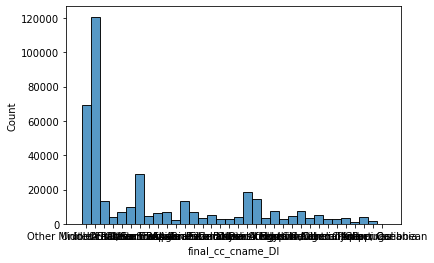

In [18]:
sns.histplot(df["final_cc_cname_DI"])

<AxesSubplot:xlabel='age', ylabel='Count'>

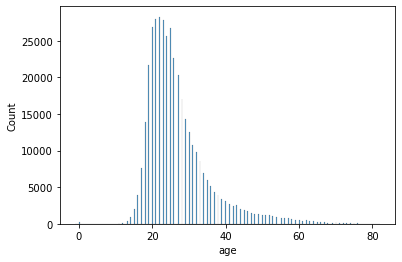

In [19]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='course_id', ylabel='Count'>

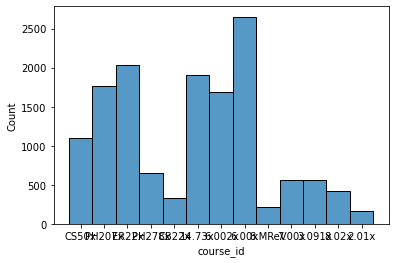

In [20]:
sns.histplot(df[df["certified"]==1], x="course_id")

In [21]:
df[df["certified"]==1]

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
25,51,HarvardX,CS50x,2023,Summer,MHxPC130320562,1,1,1,Other Europe,...,1.00,7/24/2023,5/6/2024,691,59,197757,12,0,0,29
123,290,HarvardX,CS50x,2023,Fall,MHxPC130574671,1,1,1,Egypt,...,1.00,10/16/2023,6/20/2024,219,59,197757,12,0,0,17
206,487,HarvardX,CS50x,2023,Fall,MHxPC130158860,1,1,1,India,...,1.00,10/14/2023,5/17/2024,28,15,197757,12,0,0,21
215,507,HarvardX,CS50x,2023,Summer,MHxPC130153716,1,1,1,Pakistan,...,1.00,7/24/2023,5/9/2024,295,44,197757,12,0,0,21
229,536,HarvardX,CS50x,2023,Summer,MHxPC130285816,1,1,1,Russian Federation,...,1.00,7/24/2023,5/20/2024,216,30,197757,12,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406080,569637,MITx,8.MReV,2024,Summer,MHxPC130141567,1,1,1,Indonesia,...,0.93,6/19/2024,9/5/2024,10099,55,123,40,0,0,16
406089,569647,MITx,8.MReV,2024,Summer,MHxPC130016604,1,0,1,Other South Asia,...,0.61,6/19/2024,8/1/2024,2998,14,1,24,0,0,17
406129,569691,MITx,8.MReV,2024,Summer,MHxPC130175757,1,1,1,India,...,0.67,6/19/2024,9/1/2024,11091,33,36,43,0,0,21
406516,570147,MITx,8.MReV,2024,Summer,MHxPC130418138,1,1,1,India,...,0.75,6/23/2024,8/18/2024,3012,12,197757,27,0,0,16


In [22]:
df = df.drop(["year", "semester", "start_time_DI", "last_event_DI","viewed","grade","start_time_DI","explored","last_event_DI","nevents","ndays_act","nplay_video", "nchapters", "nforum_posts","incomplete_flag"], axis=1)

In [23]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,gender,age
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,m,23
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,m,19
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,m,24
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,m,20
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,f,32
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,m,24
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,m,22
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,f,22
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,m,34


# TRANSFORM CATEGORIAL INFORMATION TO ONE-HOT ENCODING #

## GENDER ##

In [24]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

df["gender_numerical"] = df["gender"].apply(lambda x: 1 if x=='m' else 0)

In [25]:
df = df.drop(["gender"], axis=1)

In [26]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,24,1
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,22,1
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,22,0
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,34,1


## AGE ##

In [27]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
# Set age brackets
df["age_indicator"] = df["age"].apply(lambda x: 0 if x<=17 else (
                                                        1 if x>17 and x<=35 else (
                                                        2 if x>35 and x<60 else 4)))

In [28]:
# Produce age dummies
age_dummies = pd.get_dummies(df["age_indicator"], prefix="age_indicator")
age_dummies

,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
416916,0,1,0,0
416917,0,1,0,0
416918,0,1,0,0
416919,0,1,0,0


In [29]:
# Concatenate dummies to original df
df = pd.concat([df, age_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0


## LEVEL OF EDUCATION ##

In [30]:
# Generate dummies
LoE_dummies = pd.get_dummies(df["LoE_DI"], prefix="education")
LoE_dummies

,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
416916,0,0,0,1,0
416917,1,0,0,0,0
416918,1,0,0,0,0
416919,0,1,0,0,0


In [31]:
# # Concatenate educational econding to original df
df = pd.concat([df, LoE_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0,1,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0,0,0,0,0,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0,1,0,0,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0,0,0,0,0,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0,0,0,0,1,0


## REGIONAL INFORMATION ##

In [32]:
# Get regional information dummies
reg_dummies = pd.get_dummies(df["final_cc_cname_DI"], prefix="region")
reg_dummies

,region_Australia,region_Bangladesh,region_Brazil,region_Canada,region_China,region_Colombia,region_Egypt,region_France,region_Germany,region_Greece,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416916,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
416917,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# # Concatenate regional econding to original df
df = pd.concat([df, reg_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,...,0,0,0,0,0,0,0,0,0,0


## DROP ORIGINAL COLUMNS ##

In [34]:
# df_final = pd.concat([df, age_dummies, LoE_dummies, reg_dummies], axis=1)

In [35]:
# df_final

In [36]:
# # Make a copy of the processed dataset before dropping columns
df_final = df.copy()

In [37]:
df_final = df_final.drop(["final_cc_cname_DI", "LoE_DI","age","age_indicator"], axis=1)

In [38]:
df_final.head()

,Id,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_final.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russi

# TRAIN-TEST SPLIT #

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Split into training and testing data
# I am not filtering out users who are taking multiple courses because those themselves would give us an opportunity to see whether users are matched/clustered correctly

train_df_o, test_df_o = train_test_split(df, test_size=0.2, random_state=7,stratify=df["course_id"])

In [42]:
len(train_df_o)

314968

In [43]:
len(test_df_o)

78742

In [44]:
len(test_df_o["userid_DI"].unique())

74841

In [45]:
# isolate which user id is not unique
test_df_o[test_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
377707,539645,MITx,6.00x,MHxPC130211185,0,Other Africa,Secondary,26,1,1,...,0,0,0,0,0,0,0,0,0,0
364805,526402,MITx,6.002x,MHxPC130514657,0,Portugal,Secondary,20,1,1,...,0,0,0,1,0,0,0,0,0,0
71103,183377,HarvardX,PH278x,MHxPC130143930,0,Other Middle East/Central Asia,Bachelor's,28,0,1,...,0,0,0,0,0,0,0,0,0,0
83504,209060,HarvardX,ER22x,MHxPC130187514,0,Other Europe,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
92604,224036,HarvardX,ER22x,MHxPC130120756,0,Other Europe,Doctorate,31,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15744,45615,HarvardX,CS50x,MHxPC130592584,0,Other Europe,Master's,31,1,1,...,0,0,0,0,0,0,0,0,0,0
15081,43544,HarvardX,CB22x,MHxPC130149513,0,India,Secondary,22,0,1,...,0,0,0,0,0,0,0,0,0,0
304883,457684,MITx,6.002x,MHxPC130301752,1,Other Europe,Master's,27,1,1,...,0,0,0,0,0,0,0,0,0,0
288856,440721,MITx,6.002x,MHxPC130043569,0,Other Middle East/Central Asia,Bachelor's,28,1,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_df_o[train_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
85783,213290,HarvardX,CB22x,MHxPC130047152,0,Unknown/Other,Secondary,25,1,1,...,0,0,0,0,0,0,0,0,0,1
177733,319924,MITx,6.00x,MHxPC130289074,0,"Other North & Central Amer., Caribbean",Secondary,23,1,1,...,0,0,0,0,0,0,0,0,0,0
43845,119512,HarvardX,PH278x,MHxPC130374631,0,United States,Bachelor's,27,0,1,...,0,0,0,0,0,0,0,0,1,0
358288,518966,MITx,8.02x,MHxPC130187664,0,Brazil,Secondary,27,1,1,...,0,0,0,0,0,0,0,0,0,0
204735,349546,MITx,8.02x,MHxPC130592811,0,India,Secondary,21,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316747,470567,MITx,14.73x,MHxPC130448406,0,Other Europe,Secondary,25,0,1,...,0,0,0,0,0,0,0,0,0,0
79772,201404,HarvardX,CB22x,MHxPC130462452,0,United States,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,1,0
192915,336496,MITx,6.00x,MHxPC130014017,0,United States,Bachelor's,24,0,1,...,0,0,0,0,0,0,0,0,1,0
86271,214176,HarvardX,ER22x,MHxPC130004533,0,Brazil,Secondary,24,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
overlap_users = []

a = set(test_df_o["userid_DI"])
b = set(train_df_o["userid_DI"])

for userid in a:
    if userid in b:
        overlap_users.append(userid)
        
len(overlap_users)

20487

In [48]:
# overlap_users

In [49]:
overlap_users2 = [user_id for user_id in a if user_id in b]

In [50]:
len(overlap_users2)

20487

In [51]:
# https://stackoverflow.com/questions/3170055/test-if-lists-share-any-items-in-python
# bool(set(test_df["userid_DI"]) & set(train_df["userid_DI"]))
# any(i in set(test_df["userid_DI"]) for i in set(train_df["userid_DI"]))

## K-means clustering ##

In [52]:
# K-means clustering
# https://lisalondon.medium.com/applying-k-means-clustering-model-to-customer-segmentation-4254386c7563
# https://www.youtube.com/watch?v=afPJeQuVeuY
# https://www.youtube.com/watch?v=ZzJ13-6kCAY
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb


# perhaps think about number of clusters in relation to size of the dataset, such that each cluster has a certain number
#  of users. perhaps this measure as a way of delineating the values of k that will be tested

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
train_df = train_df_o.copy()

In [55]:
train_df.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'age', 'gender_numerical',
       'age_indicator', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippi

In [56]:
# ??????????????????????? consider if to remove certified ???????????????????????
# afterthought: remove certified because it is not something that would belong to a new user
#    --> the certified element should come into play when sorting recommendations and should be part of those functions
train_df = train_df.drop(["Id", "institute","course_id","certified","final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1) # LEAVE USER ID IN

In [57]:
train_df.columns

Index(['userid_DI', 'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Federation', 'region_Spain',
       'region_Ukrai

In [58]:
train_df

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
172274,MHxPC130179854,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
123079,MHxPC130578291,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117245,MHxPC130427709,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53223,MHxPC130393398,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
349370,MHxPC130212319,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,MHxPC130346920,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178860,MHxPC130442906,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
130707,MHxPC130066864,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129481,MHxPC130249189,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# useless given 0s and 1s

# sns.pairplot(train_df)

## Elbow Method ##

In [ ]:
# max_k = 100
# min_k = 5
# inertia = []
# k_values = range(min_k, max_k+1)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=7, max_iter=1000)
    
#     kmeans.fit_predict(train_df)
#     inertia.append(kmeans.inertia_)



In [ ]:
# 5<=k<=100

# plt.figure(figsize=(20,8))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

In [ ]:
# 2<=k<=50

# plt.figure(figsize=(14,6))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

## Elbow + Silhouette Score ##

In [ ]:
# max_k = 75
# min_k = 5
# inertia = []
# silhouette_scores = []
# k_values = range(min_k, max_k+1)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=7)
    
#     cluster_labels = kmeans.fit_predict(train_df)
#     inertia.append(kmeans.inertia_)
    
#     if (k == 32 or k == 75):
    
        

#         sil_score = silhouette_score(train_df, cluster_labels)

#         silhouette_scores.append(sil_score)
    



In [ ]:
# s_scores = []

# for i in range(5,76):
#     if (i == 32):
#         s_scores.append(silhouette_scores[0])
#     elif (i==75):
#         s_scores.append(silhouette_scores[1])
#     else:
#         s_scores.append(0)
        

In [ ]:
# silhouette_scores

In [ ]:
# plt.figure(figsize=(20,8))

# plt.subplot(1,2,1)
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)

# plt.subplot(1,2,2)
# plt.plot(k_values, s_scores, marker='o', color="orange")
# plt.title('Silhouette Scores for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.xticks(k_values)
# plt.grid(True)

# plt.tight_layout()
# plt.show()

## Run Kmeans with k=75 ##

In [59]:
# Create clusters and store labels
kmeans = KMeans(n_clusters=75, max_iter = 1000, random_state=7)
cluster_labels = kmeans.fit_predict(train_df.iloc[:,1:]) # disregard user_id


In [60]:
cluster_labels

array([64, 74, 10, ...,  6, 24, 47], dtype=int32)

<AxesSubplot:ylabel='Count'>

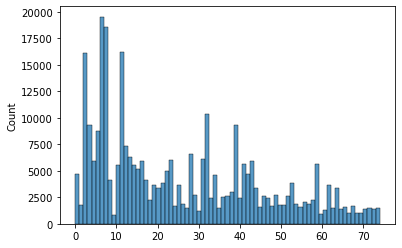

In [61]:
sns.histplot(cluster_labels)

In [62]:
kmeans.cluster_centers_

array([[-2.66453526e-15,  2.10970464e-03,  9.97890295e-01, ...,
        -4.71844785e-16,  1.00000000e+00,  1.26634814e-16],
       [ 6.54575893e-01, -7.63278329e-17,  1.00000000e+00, ...,
         4.85722573e-17, -5.55111512e-17, -4.16333634e-17],
       [ 1.00000000e+00, -9.43689571e-16,  9.93043046e-01, ...,
         1.34614542e-15,  1.00000000e+00,  3.10515502e-16],
       ...,
       [ 6.93219223e-01, -1.17961196e-16,  1.00000000e+00, ...,
         8.32667268e-17, -5.55111512e-17, -3.98986399e-17],
       [ 8.15884477e-01, -9.71445147e-17,  1.00000000e+00, ...,
         8.32667268e-17, -5.55111512e-17, -3.81639165e-17],
       [ 8.22485207e-01, -1.24900090e-16,  1.00000000e+00, ...,
         7.63278329e-17, -5.55111512e-17, -4.16333634e-17]])

In [63]:
train_df["clusters"] = cluster_labels

In [64]:
train_df.head()

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
172274,MHxPC130179854,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,64
123079,MHxPC130578291,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74
117245,MHxPC130427709,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
53223,MHxPC130393398,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,32
349370,MHxPC130212319,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,58


## Get prediction on test data ##

In [68]:
test_df = test_df_o.copy()

In [69]:
test_df = test_df.drop(["Id", "institute", "course_id", "certified", "final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1) # for the moment, do not preserve user_id

In [70]:
test_df

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
391791,MHxPC130199717,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54637,MHxPC130196100,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248684,MHxPC130042168,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
210927,MHxPC130579317,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108719,MHxPC130399848,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101984,MHxPC130516626,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
205957,MHxPC130032275,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62381,MHxPC130531146,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16962,MHxPC130115578,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
predicted_labels = kmeans.predict(test_df.iloc[:,1:])
predicted_labels

array([ 7, 43, 37, ...,  2,  6, 11], dtype=int32)

In [72]:
test_df["clusters"] = predicted_labels

In [75]:
kmeans.predict([test_df.iloc[0,1:-1]])

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([7], dtype=int32)

In [82]:
get_cluster([test_df.iloc[2,1:-1]])

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


37

In [ ]:
np.array([test_df.iloc[0,:].values])

In [ ]:
np.array([test_df.iloc[0,:-1]])

In [ ]:
s = np.array(test_df.iloc[0,:-1]).reshape(1,-1)
s

In [ ]:
kmeans.predict([test_df.iloc[0,:-1].values])

In [ ]:
sns.histplot(predicted_labels)

In [ ]:
test_df["clusters"]

In [ ]:
test_df.iloc[0,-1:]

In [ ]:
test_df.columns

## Measure distance for a certain test point ##

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
np.array((test_df.iloc[1,:-1])).reshape(1, -1)

array([['MHxPC130196100', 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=object)

In [267]:
train_df_o

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
172274,311670,HarvardX,CS50x,MHxPC130179854,0,United States,Secondary,55,1,2,...,0,0,0,0,0,0,0,0,1,0
123079,258176,HarvardX,ER22x,MHxPC130578291,0,Mexico,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,0,0
117245,252077,HarvardX,CB22x,MHxPC130427709,0,Other Europe,Secondary,33,1,1,...,0,0,0,0,0,0,0,0,0,0
53223,139996,HarvardX,PH278x,MHxPC130393398,0,United States,Bachelor's,29,0,1,...,0,0,0,0,0,0,0,0,1,0
349370,508570,MITx,6.00x,MHxPC130212319,0,Spain,Master's,27,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,301548,HarvardX,ER22x,MHxPC130346920,0,Colombia,Bachelor's,22,0,1,...,0,0,0,0,0,0,0,0,0,0
178860,321164,MITx,6.00x,MHxPC130442906,0,United Kingdom,Secondary,27,1,1,...,0,0,0,0,0,0,0,1,0,0
130707,266110,HarvardX,CS50x,MHxPC130066864,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
129481,264825,HarvardX,CS50x,MHxPC130249189,0,Other Middle East/Central Asia,Less than Secondary,16,1,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
len(set(pt.index))

263773

In [311]:
## V1 OF THE RECOMMENDER
## PROBLEM: ALL USERS IN A CLUSTER WOULD END UP HAVING THE SAME SET OF RECOMMENDATIONS
## RETURN TO PREVIOUS VERSION OF THE RECOMMENDER

def get_top_n_recommendations_v1(user_vector, df=train_df, ratings_df=train_df_o, n=5):
    
    # STEP 1:
    # Find appropriate cluster for the user
    cluster = get_cluster(user_vector)
    
    
    # STEP 2:
    # Assign cluster to correct df
    ratings_df["clusters"] = df["clusters"]

    # Get ratings_df subset based on cluster number
    ratings_df = ratings_df[ratings_df["clusters"]==cluster]
    
    
    # STEP 3: Create a pivot table
    course_completion_table = pd.pivot_table(ratings_df, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
    
    
    # STEP 4: Reduce size of cluster by eliminating users who have not completed any courses
    # Compute the sum for all rows 
    course_completion_table["sum"] = [np.nansum(course_completion_table.loc[row,:].values) for row in course_completion_table.index]
    
    # Eliminate users/rows that do not have any completions
    course_completion_table = course_completion_table[course_completion_table["sum"]>=1]
    
    
    # STEP 5: Calculate recommender percentages for all courses
    # Create variables to store information
    course_tally = {}
    count = []
    
    # Find the number of people who completed each course
    for course in course_completion_table.columns[:-1]:
        s = np.nansum(course_completion_table[course])
        count.append(s)
    
    # Sort counts to produce rank
    sorted_counts_idx = np.argsort(count)[::-1]
    
    # Calculate total
    total = sum(count)

    # Create count object to return
    for i in range(len(sorted_counts_idx)):
        course = course_completion_table.columns[sorted_counts_idx[i]]
        val = count[sorted_counts_idx[i]]
        percentage = val/total
        rank = i+1
        course_tally[course] = tuple([val, rank, percentage])

    
    # STEP 6: filter top n courses
    filtered_courses = {} 
    
    for course in course_tally.keys():
        if(course_tally[course][1] <= n):
            filtered_courses[course] = course_tally[course]
    
    return filtered_courses

In [248]:
train_df[train_df["clusters"]==43]

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
207614,MHxPC130159986,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
61027,MHxPC130233280,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
198095,MHxPC130567308,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
19519,MHxPC130354364,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
319757,MHxPC130125156,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148988,MHxPC130578482,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
99427,MHxPC130267698,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
117713,MHxPC130176123,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
162936,MHxPC130092652,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43


In [77]:
pt = pd.pivot_table(train_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
pt.columns

Index(['14.73x', '2.01x', '3.091x', '6.002x', '6.00x', '7.00x', '8.02x',
       '8.MReV', 'CB22x', 'CS50x', 'ER22x', 'PH207x', 'PH278x'],
      dtype='object', name='course_id')

In [145]:
# Define functions to isolate top n closest datapoints in the appropriate cluster for every record


def get_cluster (user_vector, estimator=kmeans):
    '''
        Funcion that takes a vector containing demographic data from a user and returns the predicted cluster for that user
    '''
    
    return estimator.predict(user_vector)[0]

def get_user_distances (user_vector, df=train_df):
    '''
        Function that takes a user vector containing demographic information and returns the distances from every user in the cluster to the test user
        
        Inputs:
            - user_vector : vector denoting user featuers
            -    df       : dataframe containing users and cluster information
            
        Output:
            - sorted_indices : list of indices, sorted in reverse order, denoting the cosine distances from the test users to other users in the cluster
            -   df_subset    : return the subset of the dataframe containing the cluster for future calculations
        
    '''
    
    # Get cluster number
    cluster_num = get_cluster(user_vector)
#     print("cluster: ", cluster_num)
    
    # Isolate all items in the cluster
    df_subset = df[df["clusters"]==cluster_num]
#     print(df_subset.index)
    
    # Calculate cosine distances from the test user to each user in the cluster ignoring cluster information included in dataframe
    cosine_distances = cosine_similarity(user_vector, df_subset.iloc[:,1:-1])[0] # unest array
    
    # Sort distances in reverse order
    sorted_indices = np.argsort(cosine_distances)[::-1]
#     print(df_subset.iloc[sorted_indices[0]])
    
    return sorted_indices, df_subset
    
    
# def get_top_n_recommendations(user_vector, df=train_df, ratings_df=pt):
    
#     # STEP 1
#     # Calculate all distances from a new user to the rest of the records in that cluster
#     sorted_users, cluster = get_user_distances(user_vector, df)
#     print(f"Cluster: {cluster}")
# #     return sorted_users
    
    
#     # STEP 2: Check for and eliminate duplicates among the sorted users
#     if len(set(sorted_users)) < len(sorted_users):
#         print("DUPLICATE ENTRIES!!!")
    
    
    #     # Eliminate duplicate entries in pivot table if there should
    #     #  be any and maintain the user's first placement
    #     new_user_list = []
    #     for i in range(len(user_ids)):
    #         if user_ids[i] not in new_user_list:
    #             new_user_list.append(user_ids[i])
    
    # Drop columns not needed for pivot table -- necessary???
    # https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
    # ratings_df = ratings.loc[:, df_cert.columns.intersection(["course_id", "userid_DI", "certified"])]
    
    # Narrow down user info to cluster
    # https://stackoverflow.com/questions/61291741/passing-list-likes-to-loc-or-with-any-missing-labels-is-no-longer-supported
#     ratings_df = ratings_df.reindex(sorted_users)
    
    # Create pivot table using user IDs, course codes, and certification information
#     course_completion_table = pd.pivot_table(ratings_df, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
    
    
    # STEP 3: Reduce size of cluster by eliminating users who have not completed any courses
    # Compute the sum for all rows 
#     course_completion_table["sum"] = [np.nansum(course_completion_table.loc[row,:].values) for row in course_completion_table.index]
    
    # Eliminate users/rows that do not have any completions
#     course_completion_table = course_completion_table[course_completion_table["sum"]>=1]
    
    # STEP 4: 
    # Define variables to hold recommended courses
    recommended_courses = set()
    count = 0

#     while (len(recommended_courses)<5 and count<len(sorted_users)):
        
# #         print(sorted_users[count])
# #         print(pt.iloc[5952])
# #         print(sorted_users[count])
#         # Isolate row in pivot table
#         row = pt.iloc[sorted_users[count]].values
# #         print(row)

#         # find successfully completed courses
#         course_idxs = np.where(row == 1.)[0] # isolate first dimension
        

#         if (len(course_idxs) != 0):
# #             print(course_idxs)
#             for idx in course_idxs:
#                 recommended_courses.add(idx) 

#         count += 1

#     course_codes = []
#     for course in recommended_courses:
#         course_codes.append(pt.columns[course])
#     print(f"Recommended courses: {recommended_courses}, count: {count}")
    
#     return course_codes

def tabulate_results_CF(user):
    pass

In [286]:
    
def get_top_n_recommendations(user_vector, df=train_df, ratings_df=pt, n=5):
    
    # STEP 1
    # Calculate all distances from a new user to the rest of the records in that cluster
    sorted_idxs, cluster = get_user_distances(user_vector, df)
#     print(sorted_idxs[:5])
#     print(cluster.iloc[sorted_idxs[0],:5])
#     print(cluster.iloc[sorted_idxs[0],0])

    # Return a sorted list of user IDs using the cluster indices
    sorted_users = [cluster.iloc[sorted_idxs[i], 0] for i in range(len(sorted_idxs))]
    
    # STEP 2: Check for and eliminate duplicates among the sorted users
    if len(set(sorted_users)) < len(sorted_users):
        print("DUPLICATE ENTRIES!!!")
        print(f"len total: {len(sorted_users)}, len unique: {len(set(sorted_users))}")
        
        # Eliminate duplicate entries in sorted ID list
        temp_user_list = []
        for i in range(len(sorted_users)):
            if sorted_users[i] not in temp_user_list:
                temp_user_list.append(sorted_users[i])
        
        sorted_users = temp_user_list
#         print(len(sorted_users))
    
    
    # STEP 3: Define ratings subset
    ratings_subset_df = ratings_df.loc[sorted_users]
    
    
    # STEP 4: Define
    # Define variables
    recommended_courses = set()
    count = 0
    
    
    while (len(recommended_courses)<n and count<len(sorted_users)):
        
#         print(sorted_users[count])
#         print(pt.iloc[5952])
#         print(sorted_users[count])
        # Isolate row in pivot table
        row = ratings_subset_df.loc[sorted_users[count]].values
#         print(row)
        
        # Sum up row to check for completed courses
        r_sum = np.nansum(row)
        if (r_sum >=1):
            course_idxs = np.where(row == 1.)[0]
            
        # Find successfully completed courses and add them to the list
        course_idxs = np.where(row == 1.)[0] # isolate first dimension
#         print(f"r_sum: {r_sum}, idx: {course_idxs}")
        for idx in course_idxs:
                recommended_courses.add(idx) 
        

        count += 1

    course_codes = []
    for course in recommended_courses:
        course_codes.append(pt.columns[course])
    print(f"Recommended courses: {recommended_courses}, count: {count}")
    
    return course_codes

In [210]:
test_user = np.array(test_df.iloc[1, 1:-1]).reshape(1,-1)

In [307]:
get_top_n_recommendations(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


DUPLICATE ENTRIES!!!
len total: 5953, len unique: 5154
Recommended courses: {0, 5, 10, 11, 12}, count: 382


['14.73x', '7.00x', 'ER22x', 'PH207x', 'PH278x']

In [226]:
len(res)

5154

In [230]:
pt.loc[res]

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x
userid_DI,,,,,,,,,,,,,
MHxPC130314059,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130298407,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
MHxPC130530061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
MHxPC130354014,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130158294,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MHxPC130070910,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130372294,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130534080,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
r = get_top_n_recommendations_v1(test_user)
r

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


{'PH207x': (61.0, 1, 0.21180555555555555),
 '14.73x': (42.0, 2, 0.14583333333333334),
 '6.002x': (39.0, 3, 0.13541666666666666),
 'ER22x': (36.0, 4, 0.125),
 'CB22x': (25.0, 5, 0.08680555555555555)}

In [305]:
count = 5
new_dict = {}

for c in r:
    if(r[c][1]<=count):
#     print(r[c][1])
        new_dict[c]=r[c]

print(new_dict)

{'PH207x': (61.0, 1, 0.21180555555555555), '14.73x': (42.0, 2, 0.14583333333333334), '6.002x': (39.0, 3, 0.13541666666666666), 'ER22x': (36.0, 4, 0.125), 'CB22x': (25.0, 5, 0.08680555555555555)}


In [295]:
r.items()

dict_items([('PH207x', (61.0, 1, 0.21180555555555555)), ('14.73x', (42.0, 2, 0.14583333333333334)), ('6.002x', (39.0, 3, 0.13541666666666666)), ('ER22x', (36.0, 4, 0.125)), ('CB22x', (25.0, 5, 0.08680555555555555)), ('PH278x', (19.0, 6, 0.06597222222222222)), ('6.00x', (15.0, 7, 0.052083333333333336)), ('CS50x', (14.0, 8, 0.04861111111111111)), ('7.00x', (14.0, 9, 0.04861111111111111)), ('3.091x', (12.0, 10, 0.041666666666666664)), ('8.02x', (9.0, 11, 0.03125)), ('8.MReV', (2.0, 12, 0.006944444444444444)), ('2.01x', (0.0, 13, 0.0))])

In [245]:
idx, sub_df = get_user_distances(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [109]:
kmeans.predict(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([43], dtype=int32)

In [ ]:
len(idx)

In [104]:
train_df[train_df["clusters"]==43]

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
207614,MHxPC130159986,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
61027,MHxPC130233280,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
198095,MHxPC130567308,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
19519,MHxPC130354364,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
319757,MHxPC130125156,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148988,MHxPC130578482,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
99427,MHxPC130267698,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
117713,MHxPC130176123,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43
162936,MHxPC130092652,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,43


In [ ]:
len(pt)

In [98]:
rec, users = get_top_n_recommendations_v1(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


cluster:  43
5953


In [99]:
users

array([5952, 2657, 4531, ..., 5821, 2061, 2202])

In [100]:
rec

{'CS50x': (85.0, 1, 0.4187192118226601),
 'PH207x': (67.0, 2, 0.33004926108374383),
 'ER22x': (38.0, 3, 0.18719211822660098),
 'PH278x': (11.0, 4, 0.054187192118226604),
 'CB22x': (2.0, 5, 0.009852216748768473)}

In [ ]:
df_s = train_df[train_df["clusters"]==12]
df_s

In [ ]:
pt.iloc[5952]

In [ ]:
train_df[train_df.index==2657]

In [ ]:
test_df["userid"] = test_df_o["userid_DI"]
test_df


In [88]:
test_df.columns

Index(['userid_DI', 'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Federation', 'region_Spain',
       'region_Ukrai

In [ ]:
test_u

In [ ]:
certified_ids = test_df_o.index #[test_df_o["certified"]==1]["Id"]
len(certified_ids)

In [ ]:
test_df_o

In [ ]:
test_df

In [ ]:
len(train_df.reindex(su))

In [ ]:
ptt

In [ ]:
np.nansum(ptt["14.73x"])

In [ ]:
course_tally = {}
count = []

for course in ptt.columns[:-1]:
    s = np.nansum(ptt[course])
    count.append(s)


print(ptt.columns[:-1])
print(count)

scc = np.argsort(count)[::-1]
print(scc)
csum = sum(count)
print(csum)

for i in range(len(scc)):
    print(ptt.columns[scc[i]], ": ", count[scc[i]]," -- rank: ", i+1)
    
    course = ptt.columns[scc[i]]
    val = count[scc[i]]
    percentage = val/csum
    rank = i+1
    course_tally[course] = tuple([val, rank, percentage])

print(course_tally)

In [ ]:
test_df_o.iloc[0]

In [ ]:
df_cert = train_df_o.copy()

# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
df_cert = df_cert.loc[:, df_cert.columns.intersection(["course_id", "userid_DI", "certified"])]

In [ ]:
# https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
# df_cert.loc[:, df_cert.columns.intersection(["course_id", "userid_DI", "certified"])]

In [ ]:
# df_cert.index=train_df_o.index

In [ ]:
df_cert

In [ ]:
ptt = pd.pivot_table(df_cert, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
ptt["sum"] = [np.nansum(ptt.loc[row,:].values) for row in ptt.index]

In [ ]:
ptt = ptt[ptt["sum"]>= 1]

In [ ]:
ptt.columns[:-1]

In [ ]:
ptt.index.unique()

In [ ]:
# sum up row values
sum([np.nansum(ptt.loc[row,:].values) for row in ptt.index])

In [ ]:
test_user = np.array(test_df.iloc[1, :-1]).reshape(1,-1)

In [ ]:
test_df.iloc[1, -1:]

In [ ]:
len(set(ptt.index))

In [ ]:
for i in range(75):
    print(len(train_df[train_df["clusters"]==i]))


In [ ]:
s, c = get_user_distances(test_user)

In [ ]:
s

In [ ]:
len(s)

In [ ]:
len(set(s))

In [ ]:
len(c)

In [ ]:
s

In [ ]:
# Get user ids for sorted list

user_ids = [c.iloc[s[i],0] for i in range(len(s))]
len(user_ids)

In [ ]:
train_df_o

In [ ]:
train_df_o.loc[s[:5], ]

In [ ]:
train_df.loc[s[:5], ]

## Create Pivot Table ##

In [ ]:
# create pivot table
pt = pd.pivot_table(train_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
                                                             # , "Id"
pt

In [ ]:
# pt["id"]=pt.index

In [ ]:
# pt.drop_duplicates()

In [ ]:
len(set(pt.id))  # no duplicates in original pt

In [ ]:
# pt[pt.index=="MHxPC130596415"]

In [ ]:
# eliminate duplicate entries
new_user_list = []
for i in range(len(user_ids)):
    if user_ids[i] not in new_user_list:
        new_user_list.append(user_ids[i])

In [ ]:
len(user_ids)

In [ ]:
len(set(user_ids))

In [ ]:
len(new_user_list)

## ATTEMPT AT MORE EFFICIENT RECOMMENDER ##

In [ ]:
pt_copy2 = pt.loc[new_user_list, :] # remove duplicate entries
# pt_copy2 = pt_copy2.drop("id", axis=1)
pt_copy2

In [ ]:
# Recommend 5 courses from nearest users
recommended_courses = set()
count = 0

# find top n courses
while (len(recommended_courses)<5 and count<len(new_user_list)):
    
    # Isolate row in pivot table
    row = pt_copy2[pt_copy2.index==new_user_list[count]].values[0]
    row_sum = np.nansum(row)
    
    # find successfully completed courses
    if row_sum >= 1:
        course_idxs = np.where(row == 1.)[0] # isolate first dimension
        for idx in course_idxs:
            recommended_courses.add(idx) 
            
    count += 1

    

    print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
s = []

for i in range(len(pt_copy2.columns)):
    s.append(np.nansum(pt_copy2[pt_copy2.columns[i]]))

In [ ]:
s

In [ ]:
[n/sum(s)*100 for n in s]

In [ ]:
# Check among top candidates

In [ ]:
#  https://www.geeksforgeeks.org/python/numpy-nansum-in-python/
# a = np.array([1,2,3.3,4, np.NaN])
# np.nansum(a)

In [ ]:
row = pt[pt.index==user_ids[9]].values[0]
row

In [ ]:
for i in range(len(user_ids[:500])):
    row = pt[pt.index==user_ids[i]]
    if (1 in row.values):
        c = np.where(r == 1.)
        if (len(c) > 1):
            print(i)

In [ ]:
r = pt[pt.index==user_ids[319]].values[0][:-1]
r

In [ ]:
n = np.where(r >= 0)[0]
n

In [ ]:
ss = set()
[ss.add(item) for item in n] 

In [ ]:
ss

In [ ]:
pt.columns

In [ ]:
st = set()
st.add(1)
st.add(2)
st.add(1)
len(st)

In [ ]:
pt_copy = pt.copy()
len(pt_copy)

In [ ]:
# NOT NEEDED
# create column in order to filter database; filtering by indices is more cumbersome
#pt_copy["userid"]=pt_copy.index

In [ ]:
pt_copy.head()

In [ ]:
pt_copy = pt_copy.loc[user_ids,:]

In [ ]:
pt_copy["ids"] = pt_copy.index
pt_copy

In [ ]:
pt_copy.dropna(axis=0,how='all')

In [ ]:
# CATEGORICAL SORT
# https://towardsdev.com/how-to-sort-a-pandas-dataframe-using-a-custom-list-order-with-categorical-377a3ea9506

In [ ]:
pt_copy.index.unique()

In [ ]:
#pt_copy["ids"]= pd.Categorical(pt_copy["ids"], categories=user_ids, ordered=True)

In [ ]:
##############################################
#                                            #
#   FIRST VERSION OF A WORKING RECOMMENDER   #
#                                            #
# -sorts based on completed courses, which   #
#    incorporates a kind of rating mecahnism #
#                                            #
##############################################

recommended_courses = set()
count = 0

while (len(recommended_courses)<5 and count<len(new_user_list)):
    
    # Isolate row in pivot table
    row = pt[pt.index==new_user_list[count]].values[0]
#     print(row)
    
    # find successfully completed courses
    course_idxs = np.where(row == 1.)[0] # isolate first dimension
#     print(course_idxs)
    
    if (len(course_idxs) != 0):
        for idx in course_idxs:
            recommended_courses.add(idx) 
            
    count += 1

    
print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
# Attempt to isolate closest users -- 20th percentile

percentile_20th= int(len(new_user_list)/100 *20)
percentile_20th

In [ ]:
pt.iloc[:percentile_20th]

s = []

for i in range(len(pt.columns[:-1])):
    s.append(np.nansum(pt.iloc[:percentile_20th,i].values))

s
# print(f"Recommended courses: {recommended_courses}, count: {count}")

In [ ]:
np.argsort(s)[::-1]

In [ ]:
sum(s)

In [ ]:
test_user

In [ ]:
np.where(row==1)

In [ ]:
# accessing data and functions across notebooks: 

# https://stackoverflow.com/questions/49817409/running-a-jupyter-notebook-from-another-notebook
# https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks/60863662
# https://stackoverflow.com/questions/19564625/how-can-i-import-from-another-ipython-notebook
# https://stackoverflow.com/questions/54317381/selectively-import-from-another-jupyter-notebook
# https://github.com/jupyterlab/jupyterlab/issues/10873

In [ ]:
# check users
cosine_similarity(test_user, np.array(c.iloc[s[300:500],1:-1]))

In [ ]:
get_cluster(test_user)

In [ ]:
s,c = get_top_n_recommendations(test_user)

In [ ]:
s

In [ ]:
test_user = np.asarray(test_df.iloc[1,:-1]).reshape(1,-1)
test_user

## attempt a test ##

In [ ]:
cosine_similarity(test_user, [df_t.iloc[0,:-1]])

In [ ]:
get_cluster(np.asarray(test_df.iloc[1,:-1]).reshape(1,-1))

In [ ]:
df_t = top_n_nearest_users(test_user)

In [ ]:
a, b = get_top_n_recommendations(test_user)

In [ ]:
a

In [ ]:
b.index[1121]

In [ ]:
train_df_o[train_df_o.index==302297]

In [ ]:
train_df[train_df.index==302297]

In [ ]:
np.argsort(nearest_users[0])[::-1]

In [ ]:
nearest_users[0][

In [ ]:
idxs = []

for i, val in enumerate(nearest_users[0]):
    if (val > 0.99999999999999):
        idxs.append(i)

In [ ]:
for i in idxxnp.array(df_t.iloc[5,:-1])

In [ ]:
nearest_users[0][10]

In [ ]:
df_t.iloc[idxs].index

In [ ]:
user_ids = []

for idx in df_t.iloc[idxs].index:
    user_ids.append(df.iloc[df.index==idx])

user_ids[0]

In [ ]:
df.head()

In [ ]:
df[df.index==df_t.iloc[idxs].index[0]]

In [ ]:
df[df["ID"]==user_ids[0]]

In [ ]:
df.loc[df.index==39598, "Id"]

In [ ]:
# Isolate recods in train_dt
train_df.iloc[df_t.iloc[idxs].index, :]

In [ ]:
plt.plot(nearest_users[0])

In [ ]:
cosine_similarity(test_user, df_t.iloc[:, :-1])[0]

In [ ]:
df_t.iloc[:5,:-1]

In [ ]:
df_t.index[0]

In [ ]:
df_t.iloc[84425]

In [ ]:
train_df.iloc[0,:-1]

In [ ]:
# Isolate cluster in training data
train_df[train_df["clusters"]==2]


In [ ]:
# Check distance of test case to cluster centre:
# https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster

In [ ]:
# 1) use k parameter to generate cluster lables
# 2) add cluster labels to dataset

In [ ]:
df.columns

In [ ]:
df["course_id"].unique()

## Create a pivot table for test data ##

In [ ]:
test_data_pt = pd.pivot_table(test_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
                                                             # , "Id"
test_data_pt

In [ ]:
test_data_pt[test_data_pt["14.73x"]==1]

In [ ]:
test_data_pt[test_data_pt.index=="MHxPC130596096"].values[0]

In [ ]:
# Reduce size of dataset by removing all 0 rows (i.e., all rows that do not have a positive ranking)
test_user_set = []

for user in test_data_pt.index:
    row_vals = test_data_pt[test_data_pt.index==user].values[0]
    if (np.nansum(row_vals)>=1):
        test_user_set.append(user)
        
len(test_user_set)

In [ ]:
# test_user_set

In [ ]:
test_data_pt_2 =test_data_pt[test_data_pt.index.isin(test_user_set)]

In [ ]:
test_data_pt_2

In [ ]:
for user in test_data_pt_2.index:
    row_vals = test_data_pt_2[test_data_pt_2.index==user].values[0]
    if (np.nansum(row_vals)>=2):
        print(user)

In [ ]:
df_o[df_o["userid_DI"]=="MHxPC130134995"]

In [ ]:
df[df["userid_DI"]=="MHxPC130134995"]